# Preamble: Module Imports

In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from pandas import DataFrame,Series
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
%matplotlib inline

# Loading, Reading, and Describing the Data

In [6]:
#Reading the csv file into a dataframe 'senda' and calling head to see the top 5 rowd of data. 
senda = pd.read_csv('1976-2016-senate-ks.csv')
senda.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party,writein,candidatevotes,totalvotes,CandidateVotes %,Win,version
0,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Dennis DeConcini,democrat,False,400334,741210,54.01%,1,20171011
1,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Sam Steiger,republican,False,321236,741210,43.34%,0,20171011
2,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Bob Field,independent,False,10765,741210,1.45%,0,20171011
3,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Allan Norwitz,libertarian,False,7310,741210,0.99%,0,20171011
4,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Wm. Mathews Feighan,independent,False,1565,741210,0.21%,0,20171011


In [7]:
# Running descriptive statistics on the dataframe
senda.describe()

,year,state_fips,state_cen,state_ic,candidatevotes,totalvotes,Win,version
count,3270.000000,3270.000000,3270.000000,3270.000000,3.270000e+03,3.270000e+03,3270.000000,3270.0
mean,1997.975535,28.856575,53.183180,39.208563,3.972308e+05,2.165188e+06,0.218349,20171011.0
std,12.254840,15.459612,26.003031,22.700531,7.550154e+05,2.101348e+06,0.413188,0.0
min,1976.000000,1.000000,11.000000,1.000000,1.000000e+00,1.000000e+00,0.000000,20171011.0
25%,1988.000000,17.000000,33.000000,21.000000,4.726250e+03,6.450260e+05,0.000000,20171011.0
50%,2000.000000,29.000000,54.000000,41.000000,5.508500e+04,1.526782e+06,0.000000,20171011.0
75%,2010.000000,41.000000,74.000000,56.000000,4.733212e+05,2.743023e+06,0.000000,20171011.0
max,2016.000000,56.000000,95.000000,82.000000,7.864624e+06,1.257851e+07,1.000000,20171011.0


In [8]:
senda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 18 columns):
year                3270 non-null int64
state               3270 non-null object
state_po            3270 non-null object
state_fips          3270 non-null int64
state_cen           3270 non-null int64
state_ic            3270 non-null int64
office              3270 non-null object
district            3270 non-null object
stage               3270 non-null object
special             3270 non-null bool
candidate           3083 non-null object
party               2755 non-null object
writein             3270 non-null bool
candidatevotes      3270 non-null int64
totalvotes          3270 non-null int64
CandidateVotes %    3270 non-null object
Win                 3270 non-null int64
version             3270 non-null int64
dtypes: bool(2), int64(8), object(8)
memory usage: 415.2+ KB


# Data Cleaning

In [0]:
#Dropping columns with repetitve or unneccasary data
senda.drop(columns = ['state_po','version','state','state_cen', 'state_ic', 'office','district','stage','special','writein'], axis = 1, inplace = True)

In [10]:
#Adding NaN as a replacement for missing data in the candidate column
senda['candidate'].replace('',np.nan)

0                Dennis DeConcini
1                     Sam Steiger
2                       Bob Field
3                   Allan Norwitz
4             Wm. Mathews Feighan
5            S. I. (Sam) Hayakawa
6                  John V. Tunney
7                      David Wald
8                      Jack McCoy
9                      Omari Musa
10         Lowell P. Weicker, Jr.
11                Gloria Schaffer
12                Robert Barnabei
13                        scatter
14           William V. Roth, Jr.
15              Thomas C. Maloney
16                 Donald G. Gies
17            Joseph F. McInerney
18             John A. Massimilla
19                  Lawton Chiles
20                     John Grady
21                        scatter
22             Spark M. Matsunaga
23                  William Quinn
24              Anthony N. Hodges
25                James D. Kimmel
26                 Rockne Johnson
27               Richard G. Lugar
28                   Vance Hartke
29            

In [11]:
#Adding NaN as a replacement for missing data, in the party column
senda['party'].replace('',np.nan)

0                      democrat
1                    republican
2                   independent
3                   libertarian
4                   independent
5                    republican
6                      democrat
7             peace and freedom
8          american independent
9                   independent
10                   republican
11                     democrat
12         american independent
13                          NaN
14                   republican
15                     democrat
16                     american
17                         none
18                  prohibition
19                     democrat
20                   republican
21                          NaN
22                     democrat
23                   republican
24                  prohibition
25                          NaN
26                  libertarian
27                   republican
28                     democrat
29                          NaN
                 ...           
3240    

In [0]:
#Dropping all missing columns from across the dataset 
senda.dropna(inplace = True)

In [0]:
#Updating the Column name to make it more easier to process
senda = senda.rename({'CandidateVotes %':'CandidateVotes_Pct'}, axis='columns')

In [0]:
#Updating CandidateVotes_Pct from datatype object to datatype integer
senda['CandidateVotes_Pct'] = senda.CandidateVotes_Pct.str.extract('(\d+)', expand=True).astype(int)

In [16]:
#Checking for any missing values across the updated dataset
senda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2755 entries, 0 to 3269
Data columns (total 8 columns):
year                  2755 non-null int64
state_fips            2755 non-null int64
candidate             2755 non-null object
party                 2755 non-null object
candidatevotes        2755 non-null int64
totalvotes            2755 non-null int64
CandidateVotes_Pct    2755 non-null int64
Win                   2755 non-null int64
dtypes: int64(6), object(2)
memory usage: 193.7+ KB


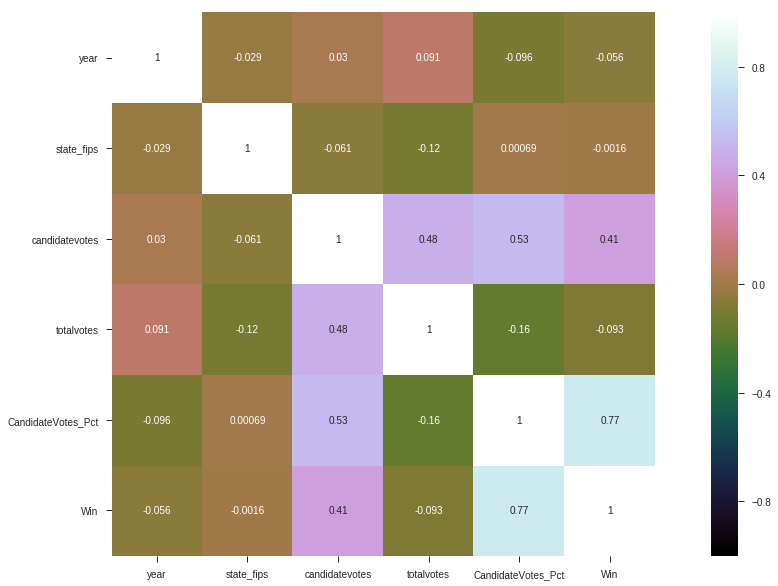

In [17]:
# Creating a Correllation matrix, using the numerical data only
corr_mat=senda.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

# Feature Engineering

In [0]:
# Creating a new column, Total Elections Entered, by using the data from the Candidate column
senda['Total_Elections_Entered'] = senda.groupby('candidate')['candidate'].transform(lambda x: x.count())

In [0]:
# Creating a new column, Total Elections Wins, by using the data from columsn Candidate and Win
senda['Total_Elections_Wins'] = senda.groupby('candidate')['Win'].transform(lambda x: x.sum())

In [20]:
# List of columns, along with datatypes, after creating two new columns from existing data
senda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2755 entries, 0 to 3269
Data columns (total 10 columns):
year                       2755 non-null int64
state_fips                 2755 non-null int64
candidate                  2755 non-null object
party                      2755 non-null object
candidatevotes             2755 non-null int64
totalvotes                 2755 non-null int64
CandidateVotes_Pct         2755 non-null int64
Win                        2755 non-null int64
Total_Elections_Entered    2755 non-null int64
Total_Elections_Wins       2755 non-null int64
dtypes: int64(8), object(2)
memory usage: 236.8+ KB


In [21]:
# Removing any candidates that won less than 10% of votes; this helps to further clean the data
senda.loc[lambda senda: senda.CandidateVotes_Pct >= 10,:]

,year,state_fips,candidate,party,candidatevotes,totalvotes,CandidateVotes_Pct,Win,Total_Elections_Entered,Total_Elections_Wins
0,1976,4,Dennis DeConcini,democrat,400334,741210,54,1,3,3
1,1976,4,Sam Steiger,republican,321236,741210,43,0,1,0
5,1976,6,S. I. (Sam) Hayakawa,republican,3748973,7470586,50,1,1,1
6,1976,6,John V. Tunney,democrat,3502862,7470586,46,0,1,0
10,1976,9,"Lowell P. Weicker, Jr.",republican,785683,1361666,57,1,2,2
11,1976,9,Gloria Schaffer,democrat,561018,1361666,41,0,1,0
14,1976,10,"William V. Roth, Jr.",republican,125454,224795,55,1,5,4
15,1976,10,Thomas C. Maloney,democrat,98042,224795,43,0,1,0
19,1976,12,Lawton Chiles,democrat,1799518,2857534,62,1,2,2
20,1976,12,John Grady,republican,1057886,2857534,37,0,1,0


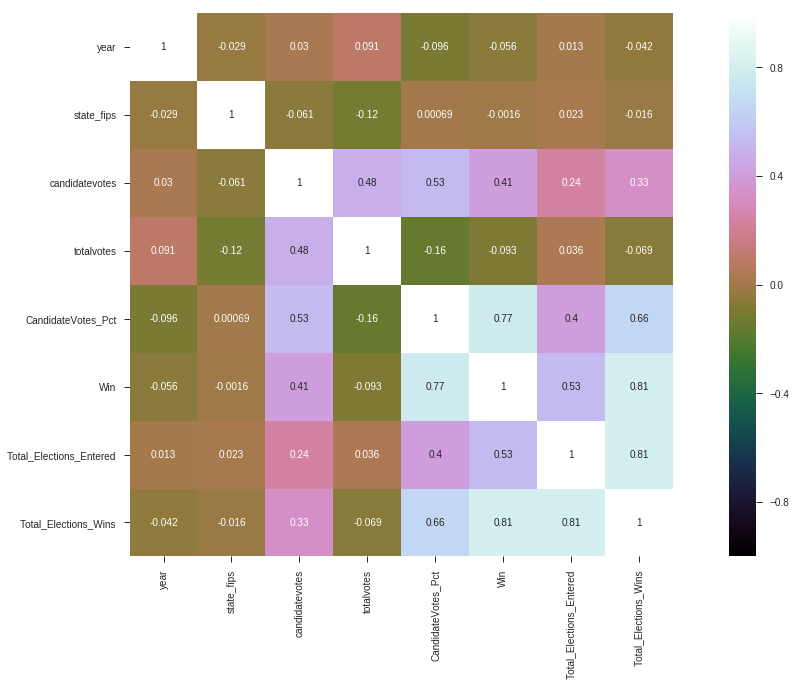

In [22]:
# Creating a Correllation matrix, after data cleaning 
corr_mat=senda.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [0]:
# Because the party column is a categorical data column, we are going to use One-Hot encoding to convert it to
# integer, either 0 or 1. 
senda_two = pd.get_dummies(senda['party'])

In [0]:
# Add the one-hot encoded party column back to the 'senda' dataset. 
senda = pd.concat([senda, senda_two], axis = 1)
senda.head()

,year,state_fips,candidate,party,candidatevotes,totalvotes,CandidateVotes_Pct,Win,Total_Elections_Entered,Total_Elections_Wins,...,veterans party of america,votekiss,wisconsin green,women's equality,workers,workers against concessions,workers league,workers peace and love,workers world,working families
0,1976,4,Dennis DeConcini,democrat,400334,741210,54,1,3,3,...,0,0,0,0,0,0,0,0,0,0
1,1976,4,Sam Steiger,republican,321236,741210,43,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1976,4,Bob Field,independent,10765,741210,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1976,4,Allan Norwitz,libertarian,7310,741210,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1976,4,Wm. Mathews Feighan,independent,1565,741210,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
senda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2755 entries, 0 to 3269
Columns: 322 entries, year to working families
dtypes: int64(8), object(2), uint8(312)
memory usage: 1.1+ MB


# Preparing dataset for Modelling

In [0]:
# Transfer the dependent variable, 'Win', to a dataframe senda_target
senda_target = senda['Win']
senda_target.head()

0    1
1    0
2    0
3    0
4    0
Name: Win, dtype: int64

In [0]:
# Drop a few other columns that will not add any major value to the modelling process
senda.drop(columns = ['candidate','party','candidatevotes','totalvotes', 'CandidateVotes_Pct', 'Win'], axis = 1, inplace = True)

In [0]:
senda.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2755 entries, 0 to 3269
Columns: 166 entries, year to working families
dtypes: int64(8), object(2), uint8(156)
memory usage: 656.5+ KB


# Modelling Dataset

# Model A: Logistic Regression

In [0]:
# Splitting the dataset into train and test using train_test_split from sklearn

X_train, X_test, y_train, y_test = train_test_split(senda, senda_target, test_size=0.33, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1845, 160) (1845,)
(910, 160) (910,)


In [0]:
# Create Logistic regression object
lr = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')

In [0]:
#fit the model using dependent and independent variables from the training dataset
lr.fit( X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
# Score the model using the training data
score_LogRegression_train = lr.score( X_train, y_train )
print(score_LogRegression_train)

0.9739837398373984


In [0]:
# Running confusion matrix on train data to show false successes and false failures

pd.DataFrame (
    confusion_matrix( y_train, lr.predict( X_train ) ),
    columns = [ 'Predicted Success', 'Predicted Failure' ],
    index = [ 'True Success', 'True Failure' ] 
)


,Predicted Success,Predicted Failure
True Success,1347,18
True Failure,30,450


In [0]:
#Predicting the dependent variable, by running the test data
y_pred = lr.predict( X_test )

In [0]:
# Determining the accuracy of applying the random forest model on the test data

score_LogRegression_test = lr.score( X_test, y_test )
print(score_LogRegression_test)

0.9802197802197802


In [0]:
# Running confusion matrix on test data to show false successes and false failures
pd.DataFrame (
    confusion_matrix( y_test, y_pred ),
    columns = [ 'Predicted Success', 'Predicted Failure' ],
    index = [ 'True Success', 'True Failure' ]
)

,Predicted Success,Predicted Failure
True Success,670,6
True Failure,12,222


In [0]:
# The mean squared error
Mean_Squared_Error_LogRegression = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f"% Mean_Squared_Error_LogRegression)

Mean squared error: 0.02


# Model B: Random Forest Classifier

In [0]:
# Splitting the dataset into train and test using train_test_split from sklearn

X_train, X_test, y_train, y_test = train_test_split(senda, senda_target, test_size=0.33, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1845, 160) (1845,)
(910, 160) (910,)


In [0]:
# Create Random Forest Classifier Object called rf
rf = RandomForestClassifier( max_features = 'sqrt' )

In [0]:
#fit the model using dependent and independent variables from the training dataset
rf.fit( X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
# Showing the most important x variables/features in the model
feature_importances = pd.DataFrame(
    rf.feature_importances_,
    index = X_train.columns,
    columns = [ 'Win' ] 
).sort_values( 'Win', ascending = False )

print( feature_importances )

                                           Win
Total_Elections_Wins                  0.605319
Total_Elections_Entered               0.186105
democrat                              0.045166
state_fips                            0.042345
year                                  0.040927
republican                            0.018917
libertarian                           0.013491
working families                      0.007319
independent                           0.007281
conservative                          0.004246
green                                 0.004120
liberal                               0.003856
socialist workers                     0.002959
independence                          0.002336
liberty union                         0.001556
u.s. taxpayers                        0.001430
american                              0.001286
workers world                         0.001273
natural law                           0.001197
reform                                0.000961
none         

In [0]:
# Score the model using the training data
score_Random_Forest_train = rf.score( X_train, y_train )
print(score_Random_Forest_train)

0.9978319783197832


In [0]:
# Running confusion matrix on train data to show false successes and false failures

pd.DataFrame (
    confusion_matrix( y_train, rf.predict( X_train ) ),
    columns = [ 'Predicted Success', 'Predicted Failure' ],
    index = [ 'True Success', 'True Failure' ] 
)


,Predicted Success,Predicted Failure
True Success,1362,3
True Failure,1,479


In [0]:
#Predicting the dependent variable, by running the test data
y_pred = rf.predict( X_test )

In [0]:
# Determining the accuracy of applying the random forest model on the test data

score_Random_Forest_test = rf.score( X_test, y_test )
print(score_Random_Forest_test)

0.9791208791208791


In [0]:
# Running confusion matrix on test data to show false successes and false failures
pd.DataFrame (
    confusion_matrix( y_test, y_pred ),
    columns = [ 'Predicted Success', 'Predicted Failure' ],
    index = [ 'True Success', 'True Failure' ]
)

,Predicted Success,Predicted Failure
True Success,663,13
True Failure,6,228


In [0]:
# The mean squared error
Mean_Squared_Error_Random_Forest = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f"% Mean_Squared_Error_Random_Forest)

Mean squared error: 0.02


# Model C: Bernoulli Naive Bayes

In [0]:
# Splitting the dataset into train and test using train_test_split from sklearn

X_train, X_test, y_train, y_test = train_test_split(senda, senda_target, test_size=0.33, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1845, 160) (1845,)
(910, 160) (910,)


In [0]:
# Create Bernoulli Naive Bayes object
bnb = BernoulliNB()

In [0]:
# Fit the independent and dependent variable to the model
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:
# Score the model using the traing data
score_BernoulliNB_train = bnb.score( X_train, y_train )
print(score_BernoulliNB_train)

0.9707317073170731


In [0]:
# Running confusion matrix on train data to show false successes and false failures

pd.DataFrame (
    confusion_matrix( y_train, bnb.predict( X_train ) ),
    columns = [ 'Predicted Success', 'Predicted Failure' ],
    index = [ 'True Success', 'True Failure' ] 
)

,Predicted Success,Predicted Failure
True Success,1313,52
True Failure,2,478


In [0]:
#Predicting the dependent variable, by running the test data
y_pred = bnb.predict( X_test )

In [0]:
# Determining the accuracy of applying the random forest model on the test data
score_BernoulliNB_test = bnb.score( X_test, y_test )
print(score_BernoulliNB_test)

0.9692307692307692


In [0]:
# Running confusion matrix on test data to show false successes and false failures
pd.DataFrame (
    confusion_matrix( y_test, y_pred ),
    columns = [ 'Predicted Success', 'Predicted Failure' ],
    index = [ 'True Success', 'True Failure' ]
)

,Predicted Success,Predicted Failure
True Success,650,26
True Failure,2,232


In [0]:
# The mean squared error
Mean_Squared_Error_BernoulliNB = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f"% Mean_Squared_Error_BernoulliNB)

Mean squared error: 0.03


# Model Comparison

In [0]:
score_test_data = [score_LogRegression_test,score_Random_Forest_test,score_BernoulliNB_test]
score_train_data = [score_LogRegression_train,score_Random_Forest_train,score_BernoulliNB_train]
Mean_Squared_Error = [Mean_Squared_Error_LogRegression,Mean_Squared_Error_Random_Forest,Mean_Squared_Error_BernoulliNB]

col = {'Score - Train Data':score_train_data,'Score - Test Data':score_test_data,'Mean Squared Error - Test Data': Mean_Squared_Error}
models = ['Logistic Regression','Random Forest','Bernoulli Naive Bayes']
compare = DataFrame(data=col,index=models)
compare

,Score - Train Data,Score - Test Data,Mean Squared Error - Test Data
Logistic Regression,0.973984,0.980220,0.019780
Random Forest,0.997832,0.979121,0.020879
Bernoulli Naive Bayes,0.970732,0.969231,0.030769
